In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame()
df = pd.read_csv("train_proper_csv_attack_types.csv",header = None)
df = df.rename(columns=df.iloc[0])
df = df.drop(df.index[0])
df = df.drop('unknown2',axis=1)

C:\Users\Nishant\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df1 = pd.DataFrame()
df1 = pd.read_csv("test_proper_csv_attack_types.csv",header = None)
df1 = df1.rename(columns=df1.iloc[0])
df1 = df1.drop(df1.index[0])
df1 = df1.drop('unknown2',axis=1)

C:\Users\Nishant\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df_tot = pd.concat([df,df1])

In [5]:
df_tot

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,unknown1
1,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal
2,0,udp,other,SF,146,0,0,0,0,0,...,1,0.0,0.6,0.88,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.1,0.05,0.0,0.0,1.0,1.0,0.0,0.0,dos
4,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.0,0.0,0.03,0.04,0.03,0.01,0.0,0.01,normal
5,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal
6,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.0,0.0,0.0,0.0,1.0,1.0,dos
7,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.0,0.0,1.0,1.0,0.0,0.0,dos
8,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.0,0.0,1.0,1.0,0.0,0.0,dos
9,0,tcp,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.0,0.0,1.0,1.0,0.0,0.0,dos
10,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.0,0.0,1.0,1.0,0.0,0.0,dos


In [6]:
def bool_attack(x):
    if(x != "normal"):
        return "attack"
    else:
        return "normal"

In [7]:
#preprocessing stage
from sklearn.feature_selection import SelectFpr
from sklearn.feature_selection import chi2
from sklearn.preprocessing import Normalizer

df_tot_1 = df_tot.drop('unknown1',axis=1)
df_output = df_tot['unknown1'].apply(bool_attack)
df_tot_dummies = pd.get_dummies(df_tot_1,columns = ["protocol_type","service","flag"])
x_normalise = Normalizer().fit(df_tot_dummies)
df_tot_dummies = x_normalise.transform(df_tot_dummies)
x_new = SelectFpr(chi2, alpha=0.05).fit_transform(df_tot_dummies, df_output)

C:\Users\Nishant\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:560: RuntimeWarning: invalid value encountered in less
  return self.pvalues_ < self.alpha


In [8]:
import pickle

random_forest_clf = pickle.load(open('random_forest_test.sav', 'rb'))
AdaBoost_clf = pickle.load(open('knn_5_test.sav', 'rb'))
gnb_clf = pickle.load(open('qda_test.sav', 'rb'))

C:\Users\Nishant\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator KNeighborsClassifier from version pre-0.18 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Nishant\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator QuadraticDiscriminantAnalysis from version pre-0.18 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [9]:
X_train = x_new[:125000]
y_train = df_output.iloc[:125000]
X_test = x_new[125000:]
y_test = df_output.iloc[125000:]

In [10]:
print(X_train)
print(y_train)

[[0.95521304 0.         0.         ... 0.         0.         0.        ]
 [0.49636852 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.0035164  0.        ]
 ...
 [0.04315566 0.99768308 0.         ... 0.         0.         0.        ]
 [0.10172665 0.9919802  0.         ... 0.         0.         0.        ]
 [0.04950948 0.9946905  0.         ... 0.         0.         0.        ]]
1         normal
2         normal
3         attack
4         normal
5         normal
6         attack
7         attack
8         attack
9         attack
10        attack
11        attack
12        attack
13        normal
14        attack
15        attack
16        attack
17        normal
18        attack
19        normal
20        normal
21        attack
22        attack
23        normal
24        normal
25        attack
26        normal
27        attack
28        normal
29        normal
30        normal
           ...  
124971    normal
124972    no

Classification using classifier

In [11]:
def convert_bool(x):
    if(x == "attack"):
        return 1
    else:
        return 0
    
y_train = y_train.apply(convert_bool)
y_test=y_test.apply(convert_bool)

In [12]:
y_train

1         0
2         0
3         1
4         0
5         0
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        0
14        1
15        1
16        1
17        0
18        1
19        0
20        0
21        1
22        1
23        0
24        0
25        1
26        0
27        1
28        0
29        0
30        0
         ..
124971    0
124972    0
124973    0
124974    1
124975    1
124976    0
124977    0
124978    1
124979    0
124980    1
124981    0
124982    1
124983    1
124984    0
124985    0
124986    1
124987    1
124988    0
124989    1
124990    1
124991    1
124992    1
124993    0
124994    1
124995    0
124996    0
124997    1
124998    0
124999    0
125000    0
Name: unknown1, Length: 125000, dtype: int64

In [13]:
y_train

1         0
2         0
3         1
4         0
5         0
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        0
14        1
15        1
16        1
17        0
18        1
19        0
20        0
21        1
22        1
23        0
24        0
25        1
26        0
27        1
28        0
29        0
30        0
         ..
124971    0
124972    0
124973    0
124974    1
124975    1
124976    0
124977    0
124978    1
124979    0
124980    1
124981    0
124982    1
124983    1
124984    0
124985    0
124986    1
124987    1
124988    0
124989    1
124990    1
124991    1
124992    1
124993    0
124994    1
124995    0
124996    0
124997    1
124998    0
124999    0
125000    0
Name: unknown1, Length: 125000, dtype: int64

In [14]:
rf_pred = random_forest_clf.predict(X_train)
rf_conf = random_forest_clf.predict_proba(X_train)
ada_pred = AdaBoost_clf.predict(X_train)
ada_conf = AdaBoost_clf.predict_proba(X_train)
gnb_pred = gnb_clf.predict(X_train)
gnb_conf = gnb_clf.predict_proba(X_train)

In [15]:
conf_vec_list=[]   #confidence vector (probabilty)
clf_vec_list=[]    #classification vector (output of each classifier)
state_vec_list=[]  #state vector (classfication vector + feature vector)

generate all above vector

In [16]:
for i in range(len(rf_pred)):
    tmp1=[]
    tmp1.append(convert_bool(rf_pred[i]))
    tmp1.append(convert_bool(ada_pred[i]))
    tmp1.append(convert_bool(gnb_pred[i]))
    clf_vec_list.append(tmp1)
    state_vec_list.append(tmp1+list(x_new[i]))
    
    tmp1=[]
    tmp1.append(rf_conf[i])
    tmp1.append(ada_conf[i])
    tmp1.append(gnb_conf[i])
    conf_vec_list.append(tmp1)

In [17]:
state_vec_list

[[0,
  0,
  0,
  0.9552130374684668,
  0.0,
  0.0,
  0.0,
  0.0038908881363277667,
  0.0038908881363277667,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.2918166102245825,
  0.04863610170409708,
  5.8363322044916495e-05,
  0.0003307254915878602,
  0.0,
  0.0,
  0.0,
  9.727220340819416e-05,
  0.0,
  0.0,
  0.0019454440681638833,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0,
  0,
  0,
  0.49636851938384874,
  0.0,
  0.0,
  0.0,
  0.04419719693143859,
  0.0033997843793414297,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0005099676569012145,
  0.0,
  0.8669450167320646,
  0.0033997843793414297,
  0.002039870627604858,
  0.0029918102538204583,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0033997843793414297,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [1,
  1,
  1,
  0.0,
  0.0,
  0.0,
  0.0,
  0.43251709877653177,
  0.02109839506226984,
  0.0035163991770449736,
  0.0035163991770449736,
  0.0,
  0.0,
  

In [18]:
clf_vec_list

[[0, 0, 0],
 [0, 0, 0],
 [1, 1, 1],
 [0, 0, 0],
 [0, 0, 0],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1, 1],
 [0, 0, 0],
 [1, 1, 0],
 [1, 1, 1],
 [1, 1, 1],
 [0, 0, 0],
 [1, 1, 1],
 [0, 0, 0],
 [0, 0, 0],
 [1, 1, 1],
 [1, 1, 1],
 [0, 0, 0],
 [0, 0, 0],
 [1, 1, 1],
 [0, 0, 0],
 [1, 1, 1],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [1, 1, 1],
 [1, 1, 0],
 [0, 0, 0],
 [1, 1, 0],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [1, 1, 1],
 [0, 0, 0],
 [1, 1, 1],
 [1, 1, 0],
 [1, 1, 1],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [1, 1, 1],
 [1, 1, 1],
 [0, 0, 0],
 [1, 1, 0],
 [1, 1, 1],
 [0, 0, 0],
 [1, 1, 0],
 [1, 1, 1],
 [0, 0, 0],
 [0, 0, 0],
 [0, 0, 0],
 [1, 1, 1],
 [1, 1, 1],
 [1, 1, 0],
 [0, 0, 0],
 [0, 0, 0],
 [1, 1, 1],
 [1, 1, 1],
 [0, 0, 0],
 [1, 1, 0],
 [0, 0, 0],
 [1, 1, 1],
 [1, 1, 0],
 [1, 1, 1],
 [1, 1, 1],
 [0, 0, 0],
 [1, 1, 1],
 [0, 0, 0],
 [0, 0, 0],
 [1, 1, 1],
 [0, 0, 0],
 [1, 1, 1],
 [0, 0, 0],
 [0, 0, 0],
 [1, 1, 1],
 [0, 0, 0],
 [1, 1, 1],
 [1, 1, 1],
 [1,

In [19]:
conf_vec_list

[[array([0., 1.]), array([0., 1.]), array([5.05001561e-19, 1.00000000e+00])],
 [array([0.05, 0.95]),
  array([0., 1.]),
  array([2.51031979e-12, 1.00000000e+00])],
 [array([1., 0.]), array([1., 0.]), array([1.00000000e+00, 1.61575538e-16])],
 [array([0., 1.]), array([0., 1.]), array([8.77670023e-50, 1.00000000e+00])],
 [array([0., 1.]), array([0., 1.]), array([9.7216445e-36, 1.0000000e+00])],
 [array([1., 0.]), array([1., 0.]), array([9.99999999e-01, 1.41560016e-09])],
 [array([1., 0.]), array([1., 0.]), array([1.00000000e+00, 6.02462886e-31])],
 [array([1., 0.]), array([1., 0.]), array([1.00000000e+00, 2.82395051e-11])],
 [array([1., 0.]), array([1., 0.]), array([1.00000000e+00, 2.87394252e-57])],
 [array([1., 0.]), array([1., 0.]), array([1.00000000e+00, 1.42291965e-19])],
 [array([1., 0.]), array([1., 0.]), array([1.00000000e+00, 1.25437933e-41])],
 [array([1., 0.]), array([1., 0.]), array([1.00000000e+00, 2.74062796e-45])],
 [array([0., 1.]), array([0., 1.]), array([3.58025452e-48,

feed state_vector to deep Q network and store output as Q_value_vector

In [20]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
# fix random seed for reproducibility
np.random.seed(7)

C:\Users\Nishant\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [21]:
# create model
model = Sequential()
model.add(Dense(100, input_dim=39, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

In [22]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [23]:
model.predict(np.array(state_vec_list[0:20]))  #feed state vector to model

array([[0.5222347 , 0.50197023, 0.5205848 ],
       [0.5163441 , 0.4753333 , 0.5171945 ],
       [0.5694628 , 0.5135938 , 0.51302016],
       [0.51796424, 0.49996078, 0.5007776 ],
       [0.5299175 , 0.511534  , 0.49795502],
       [0.56787443, 0.51252425, 0.5143971 ],
       [0.56754595, 0.5114145 , 0.5109592 ],
       [0.56753427, 0.51129276, 0.5142844 ],
       [0.57210755, 0.5134946 , 0.51191306],
       [0.5675782 , 0.5114218 , 0.5128663 ],
       [0.5690912 , 0.5115476 , 0.5113532 ],
       [0.56946015, 0.5114557 , 0.5104418 ],
       [0.5202295 , 0.50365883, 0.4997975 ],
       [0.544265  , 0.5057874 , 0.5313634 ],
       [0.5678013 , 0.50880486, 0.5112593 ],
       [0.56491464, 0.5072442 , 0.5164943 ],
       [0.51742667, 0.49926502, 0.5011112 ],
       [0.5837101 , 0.56830525, 0.5494417 ],
       [0.5247109 , 0.5134009 , 0.49741268],
       [0.522625  , 0.50674933, 0.49797383]], dtype=float32)

In [24]:
input_list = []
output_list = []

In [25]:
#getting reward
#using conifidence vector and classification vector
def get_rew(qval_v,y,conf_v,clf_v):
    
    act_qval=[]
    
    for j in range(3):
        
        if(y == clf_v[j]):
            #print(qval_v[j])
            #print(conf_v[j]/5)
            tmp = qval_v[j] + conf_v[j][y]/2
            
            if(tmp>1):
                tmp = 0.95

            act_qval.append(tmp)
        else:
            tmp = qval_v[j] - (conf_v[j][abs(1-y)])/2
            if(tmp<0):
                tmp = 0.05

            act_qval.append(tmp)
    
    return act_qval

In [26]:
def get_batch(ind_list, input_list, output_list):
    x=[]
    y=[]
    for item in ind_list:
        x.append(input_list[item])
        y.append(output_list[item])
    
    return x,y

In [27]:

import random

for i in range((int)(len(state_vec_list)/10)):
    
    #print("iteration: " + str(i))
    input_list = input_list + state_vec_list[i*10:(i+1)*10]
    Q_val_list = model.predict(np.array(state_vec_list[i*10:(i+1)*10]))
    act_out_list = []
    
    if(i<5):
        print(Q_val_list)
    
    for j in range(len(Q_val_list)):
        #print(conf_vec_list[i*10+j])
        act_out_list.append(get_rew(Q_val_list[j],y_train[i*10+j+1],conf_vec_list[i*10+j],clf_vec_list[i*10+j]))
        
    model.train_on_batch(np.array(state_vec_list[i*10:(i+1)*10]), np.array(act_out_list))
    
    output_list = output_list + act_out_list
    #print(len(input_list))
    #print(len(output_list))
    for j in range(10):
        ind_list = random.sample(range(0, len(input_list)), 10)
        x, y = get_batch(ind_list, input_list, output_list)
        
        model.train_on_batch(np.array(x), np.array(y))

[[0.5222347  0.50197023 0.5205848 ]
 [0.5163441  0.4753333  0.5171945 ]
 [0.5694628  0.5135938  0.51302016]
 [0.51796424 0.49996078 0.5007776 ]
 [0.5299175  0.511534   0.49795502]
 [0.56787443 0.51252425 0.5143971 ]
 [0.56754595 0.5114145  0.5109592 ]
 [0.56753427 0.51129276 0.5142844 ]
 [0.57210755 0.5134946  0.511913  ]
 [0.5675782  0.5114218  0.51286626]]
[[0.5687983  0.51476824 0.5115368 ]
 [0.5692286  0.5145462  0.5107729 ]
 [0.5191839  0.50698626 0.499835  ]
 [0.5417448  0.509118   0.5321466 ]
 [0.5676605  0.5122874  0.51127297]
 [0.56683475 0.51078564 0.5158557 ]
 [0.51832587 0.5029932  0.50093263]
 [0.57212996 0.5695045  0.5500106 ]
 [0.52071506 0.5147065  0.49714148]
 [0.52094775 0.5095146  0.49771896]]
[[0.5745819  0.519458   0.5107253 ]
 [0.5749775  0.5189501  0.5098347 ]
 [0.51944095 0.50359046 0.50034595]
 [0.50596595 0.50078386 0.502035  ]
 [0.57174367 0.51575196 0.51020086]
 [0.5191599  0.5027858  0.5011534 ]
 [0.57394814 0.5178614  0.5098468 ]
 [0.51974916 0.50434804 0.

In [28]:
act_out_list

[[0.5670143961906433, 0.5120351314544678, 0.5166942477226272],
 [0.570976197719574, 0.5159941911697388, 0.508388876914978],
 [0.5866177678108215, 0.5539737343788147, 0.522871494140427],
 [0.5667630434036255, 0.5116603970527649, 0.5151708126069983],
 [0.5229863524436951, 0.5423890948295593, 0.5144813656806946],
 [0.5312680602073669, 0.5074736475944519, 0.4978399872779846],
 [0.5667830109596252, 0.5116990804672241, 0.5128929018974304],
 [0.5212448835372925, 0.5093242526054382, 0.4998372197151184],
 [0.5196946859359741, 0.5094337463378906, 0.49985459446907043],
 [0.5216822028160095, 0.5086464285850525, 0.49928826093673706]]

In [29]:
from keras.models import model_from_json
model_json = model.to_json()
with open("model_rf_knn_qda.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_rf_knn_qda.h5")
print("Saved model to disk")

Saved model to disk


In [30]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
# load weights into new model
model.load_weights("model.h5")

In [31]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# 

# Importing denoised data

In [448]:
import pickle
with open('model_attack_prevention/X_adv_denoiser.pkl','rb') as f:
    X_adv_denoiser=pickle.load(f)

In [449]:
X_adv_denoiser

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00135657, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.98591554, 0.16889739, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.11772004, 0.21292001, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [450]:
#prediction
rf_pred_ts = random_forest_clf.predict(X_adv_denoiser)
rf_conf_ts = random_forest_clf.predict_proba(X_adv_denoiser)
ada_pred_ts = AdaBoost_clf.predict(X_adv_denoiser)
ada_conf_ts = AdaBoost_clf.predict_proba(X_adv_denoiser)
gnb_pred_ts = gnb_clf.predict(X_adv_denoiser)
gnb_conf_ts = gnb_clf.predict_proba(X_adv_denoiser)

In [451]:
X_adv_denoiser.shape

(23516, 36)

In [452]:
conf_vec_list_ts=[]
clf_vec_list_ts=[]
state_vec_list_ts=[]

In [453]:
for i in range(len(rf_pred_ts)):
    tmp1=[]
    tmp1.append(convert_bool(rf_pred_ts[i]))
    tmp1.append(convert_bool(ada_pred_ts[i]))
    tmp1.append(convert_bool(gnb_pred_ts[i]))
    clf_vec_list_ts.append(tmp1)
    state_vec_list_ts.append(tmp1+list(X_adv_denoiser[i]))
    
    tmp1=[]
    tmp1.append(rf_conf_ts[i])
    tmp1.append(ada_conf_ts[i])
    tmp1.append(gnb_conf_ts[i])
    conf_vec_list_ts.append(tmp1)

In [454]:
state_vec_list_ts

[[1,
  1,
  1,
  0.0,
  0.0,
  0.0,
  0.0,
  0.4443258,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.91395295,
  0.021068525,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0,
  1,
  0,
  0.0013565719,
  0.0,
  0.0,
  0.0,
  0.05100751,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.644765,
  0.76176876,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [1,
  1,
  1,
  0.0,
  0.0,
  0.0,
  0.0,
  0.6070517,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.80043536,
  0.033674072,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [0,
  0,
  0,
  0.16374983,
  0.0,
  0.0,
  0.0,
  0.15710849,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.65198934,

In [455]:
input_list_ts = []
output_list_ts = []
pred_list = []
input_vec = []

In [456]:
for i in range(len(rf_pred_ts)):
    tmp1=[]
    tmp1.append(convert_bool(rf_pred_ts[i]))
    tmp1.append(convert_bool(ada_pred_ts[i]))
    tmp1.append(convert_bool(gnb_pred_ts[i]))
    input_vec.append(tmp1+list(X_adv_denoiser[i]))
    


In [457]:
import copy

In [458]:
y_test

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [459]:
y_test.shape

(23516,)

In [460]:
#getting reward and new Q value
#and update deep Q network weight using batch of newly added

import random

for i in range((int)(len(state_vec_list_ts)/10)):
    
    print("iteration: " + str(i))
    input_list_ts = input_list_ts + state_vec_list_ts[i*10:(i+1)*10]
    Q_val_list = model.predict(np.array(state_vec_list_ts[i*10:(i+1)*10]))
    
    if(i%50 == 0):
        print(Q_val_list)
    
    for i in range(len(Q_val_list)):
        pred_list.append(Q_val_list[i])
        
    #scores = model.test_on_batch(np.array(state_vec_list_ts[i*10:(i+1)*10]), np.array(act_out_list))
    #print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    
    act_out_list = []
    
    for j in range(len(Q_val_list)):
        #print(conf_vec_list[i*10+j])
        act_out_list.append(get_rew(Q_val_list[j],y_test[i*10+j+1],conf_vec_list_ts[i*10+j],clf_vec_list_ts[i*10+j]))
        
    model.train_on_batch(np.array(state_vec_list_ts[i*10:(i+1)*10]), np.array(act_out_list))
    
    output_list_ts = output_list_ts + act_out_list
    #print(len(input_list))
    #print(len(output_list))
    for j in range(10):                             # Update Deep Q-network weights(w) using random batch of transitions from M                                                      
        ind_list = random.sample(range(0, len(input_list_ts)), 10)
        x, y = get_batch(ind_list, input_list_ts, output_list_ts)
        
        model.train_on_batch(np.array(x), np.array(y))


iteration: 0
[[0.90006196 0.469495   0.81424654]
 [0.93481153 0.14013225 0.7895665 ]
 [0.84418595 0.48052403 0.817296  ]
 [0.8782678  0.45437264 0.8211814 ]
 [0.9017725  0.49847806 0.8007315 ]
 [0.922133   0.4932279  0.80629176]
 [0.8640187  0.5834474  0.824189  ]
 [0.90156925 0.5771181  0.83261967]
 [0.93065834 0.50850964 0.80927694]
 [0.9193497  0.49576086 0.8057823 ]]
iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29
iteration: 30
iteration: 31
iteration: 32
iteration: 33
iteration: 34
iteration: 35
iteration: 36
iteration: 37
iteration: 38
iteration: 39
iteration: 40
iteration: 41
iteration: 42
iteration: 43
iteration: 44
iteration: 45
itera

iteration: 366
iteration: 367
iteration: 368
iteration: 369
iteration: 370
iteration: 371
iteration: 372
iteration: 373
iteration: 374
iteration: 375
iteration: 376
iteration: 377
iteration: 378
iteration: 379
iteration: 380
iteration: 381
iteration: 382
iteration: 383
iteration: 384
iteration: 385
iteration: 386
iteration: 387
iteration: 388
iteration: 389
iteration: 390
iteration: 391
iteration: 392
iteration: 393
iteration: 394
iteration: 395
iteration: 396
iteration: 397
iteration: 398
iteration: 399
iteration: 400
[[0.88345516 0.5135752  0.8200307 ]
 [0.9102571  0.4701109  0.8149663 ]
 [0.894301   0.49828902 0.8016873 ]
 [0.89961284 0.47417113 0.81105345]
 [0.8950395  0.49868235 0.79446125]
 [0.8755084  0.48727632 0.81746304]
 [0.880135   0.5061338  0.8191887 ]
 [0.895672   0.5185721  0.81870645]
 [0.92298794 0.38691157 0.8210663 ]
 [0.87421346 0.5523079  0.8289807 ]]
iteration: 401
iteration: 402
iteration: 403
iteration: 404
iteration: 405
iteration: 406
iteration: 407
iteration

iteration: 748
iteration: 749
iteration: 750
[[0.8968357  0.5782082  0.8313031 ]
 [0.8938751  0.48820013 0.80761975]
 [0.89752614 0.67283195 0.8472348 ]
 [0.8967562  0.5795262  0.8315132 ]
 [0.89731705 0.54076993 0.82517266]
 [0.8962816  0.5281967  0.8233172 ]
 [0.89421016 0.5107663  0.8093136 ]
 [0.9011951  0.42250407 0.802662  ]
 [0.8886125  0.50657815 0.82039684]
 [0.9105986  0.39241916 0.8145898 ]]
iteration: 751
iteration: 752
iteration: 753
iteration: 754
iteration: 755
iteration: 756
iteration: 757
iteration: 758
iteration: 759
iteration: 760
iteration: 761
iteration: 762
iteration: 763
iteration: 764
iteration: 765
iteration: 766
iteration: 767
iteration: 768
iteration: 769
iteration: 770
iteration: 771
iteration: 772
iteration: 773
iteration: 774
iteration: 775
iteration: 776
iteration: 777
iteration: 778
iteration: 779
iteration: 780
iteration: 781
iteration: 782
iteration: 783
iteration: 784
iteration: 785
iteration: 786
iteration: 787
iteration: 788
iteration: 789
iteration

iteration: 1102
iteration: 1103
iteration: 1104
iteration: 1105
iteration: 1106
iteration: 1107
iteration: 1108
iteration: 1109
iteration: 1110
iteration: 1111
iteration: 1112
iteration: 1113
iteration: 1114
iteration: 1115
iteration: 1116
iteration: 1117
iteration: 1118
iteration: 1119
iteration: 1120
iteration: 1121
iteration: 1122
iteration: 1123
iteration: 1124
iteration: 1125
iteration: 1126
iteration: 1127
iteration: 1128
iteration: 1129
iteration: 1130
iteration: 1131
iteration: 1132
iteration: 1133
iteration: 1134
iteration: 1135
iteration: 1136
iteration: 1137
iteration: 1138
iteration: 1139
iteration: 1140
iteration: 1141
iteration: 1142
iteration: 1143
iteration: 1144
iteration: 1145
iteration: 1146
iteration: 1147
iteration: 1148
iteration: 1149
iteration: 1150
[[0.85928303 0.505455   0.79400057]
 [0.8823078  0.4989941  0.79812545]
 [0.9090913  0.4811584  0.80875087]
 [0.8933019  0.49032295 0.8098032 ]
 [0.90275335 0.47902495 0.81399435]
 [0.89962476 0.4222701  0.80252993]


iteration: 1459
iteration: 1460
iteration: 1461
iteration: 1462
iteration: 1463
iteration: 1464
iteration: 1465
iteration: 1466
iteration: 1467
iteration: 1468
iteration: 1469
iteration: 1470
iteration: 1471
iteration: 1472
iteration: 1473
iteration: 1474
iteration: 1475
iteration: 1476
iteration: 1477
iteration: 1478
iteration: 1479
iteration: 1480
iteration: 1481
iteration: 1482
iteration: 1483
iteration: 1484
iteration: 1485
iteration: 1486
iteration: 1487
iteration: 1488
iteration: 1489
iteration: 1490
iteration: 1491
iteration: 1492
iteration: 1493
iteration: 1494
iteration: 1495
iteration: 1496
iteration: 1497
iteration: 1498
iteration: 1499
iteration: 1500
[[0.8860426  0.46754628 0.80953133]
 [0.8961886  0.48077023 0.81318563]
 [0.9068529  0.328234   0.8306792 ]
 [0.8798038  0.50937366 0.8125764 ]
 [0.90040433 0.5518561  0.8268166 ]
 [0.7303035  0.5284881  0.78876513]
 [0.8899736  0.5283588  0.8234448 ]
 [0.96776026 0.5957548  0.8176652 ]
 [0.8924581  0.5119466  0.8276788 ]
 [0.

iteration: 1820
iteration: 1821
iteration: 1822
iteration: 1823
iteration: 1824
iteration: 1825
iteration: 1826
iteration: 1827
iteration: 1828
iteration: 1829
iteration: 1830
iteration: 1831
iteration: 1832
iteration: 1833
iteration: 1834
iteration: 1835
iteration: 1836
iteration: 1837
iteration: 1838
iteration: 1839
iteration: 1840
iteration: 1841
iteration: 1842
iteration: 1843
iteration: 1844
iteration: 1845
iteration: 1846
iteration: 1847
iteration: 1848
iteration: 1849
iteration: 1850
[[0.91461754 0.38917416 0.82391006]
 [0.8236716  0.48457032 0.8147528 ]
 [0.9107989  0.48087054 0.8132063 ]
 [0.8191253  0.48559535 0.81480026]
 [0.9138602  0.6960174  0.85147625]
 [0.89229786 0.5328355  0.8236579 ]
 [0.90531677 0.49339262 0.8140219 ]
 [0.9135878  0.43873733 0.81931823]
 [0.90463936 0.48122227 0.8069005 ]
 [0.8871434  0.4975728  0.8090381 ]]
iteration: 1851
iteration: 1852
iteration: 1853
iteration: 1854
iteration: 1855
iteration: 1856
iteration: 1857
iteration: 1858
iteration: 1859

iteration: 2176
iteration: 2177
iteration: 2178
iteration: 2179
iteration: 2180
iteration: 2181
iteration: 2182
iteration: 2183
iteration: 2184
iteration: 2185
iteration: 2186
iteration: 2187
iteration: 2188
iteration: 2189
iteration: 2190
iteration: 2191
iteration: 2192
iteration: 2193
iteration: 2194
iteration: 2195
iteration: 2196
iteration: 2197
iteration: 2198
iteration: 2199
iteration: 2200
[[0.90125865 0.49636582 0.80242616]
 [0.9085843  0.47363526 0.81389916]
 [0.89516354 0.501582   0.7993991 ]
 [0.875809   0.5021798  0.81957924]
 [0.9223182  0.52166057 0.82251465]
 [0.8964556  0.47330794 0.80994666]
 [0.8881232  0.51110375 0.7971374 ]
 [0.8891485  0.41251323 0.7996166 ]
 [0.89321643 0.41461632 0.80042034]
 [0.91452193 0.5011124  0.8057597 ]]
iteration: 2201
iteration: 2202
iteration: 2203
iteration: 2204
iteration: 2205
iteration: 2206
iteration: 2207
iteration: 2208
iteration: 2209
iteration: 2210
iteration: 2211
iteration: 2212
iteration: 2213
iteration: 2214
iteration: 2215

In [461]:
len(pred_list)

23510

In [462]:
pred_list

[array([0.90006196, 0.469495  , 0.81424654], dtype=float32),
 array([0.93481153, 0.14013225, 0.7895665 ], dtype=float32),
 array([0.84418595, 0.48052403, 0.817296  ], dtype=float32),
 array([0.8782678 , 0.45437264, 0.8211814 ], dtype=float32),
 array([0.9017725 , 0.49847806, 0.8007315 ], dtype=float32),
 array([0.922133  , 0.4932279 , 0.80629176], dtype=float32),
 array([0.8640187, 0.5834474, 0.824189 ], dtype=float32),
 array([0.90156925, 0.5771181 , 0.83261967], dtype=float32),
 array([0.93065834, 0.50850964, 0.80927694], dtype=float32),
 array([0.9193497 , 0.49576086, 0.8057823 ], dtype=float32),
 array([0.88062143, 0.5057168 , 0.7995244 ], dtype=float32),
 array([0.90643615, 0.47191086, 0.81339043], dtype=float32),
 array([0.9116568 , 0.46616617, 0.8092787 ], dtype=float32),
 array([0.9027378, 0.5607046, 0.8293452], dtype=float32),
 array([0.89851665, 0.51026267, 0.82086176], dtype=float32),
 array([0.9128545, 0.6106047, 0.808433 ], dtype=float32),
 array([0.9071269, 0.4876764, 0.8

In [463]:
act_out_list

[[0.6729448437690735, 0.35935401916503906, 0.8116305239597679],
 [0.95, 0.6013051271438599, 0.8130456805229187],
 [0.95, 0.49203187227249146, 0.8180854320526123],
 [0.95, 0.5844078660011292, 0.8334578275680542],
 [0.8060172438621521, 0.40702271461486816, 0.8014647960662842],
 [0.9576479673385621, 0.4705295264720917, 0.8115665316581726],
 [0.8465476155281066, 0.5296120643615723, 0.8239806890487671],
 [0.9992308378219604, 0.42202314734458923, 0.8037273301496011],
 [0.95, 0.4771743714809418, 0.8131578564643862],
 [0.95, 0.47841712832450867, 0.806583821773529]]

In [464]:
output_list_ts

[[0.6500619649887085, 0.4694949984550476, 0.812321520606649],
 [0.95, 0.14013224840164185, 0.7895665168762207],
 [0.95, 0.4805240333080292, 0.817296028137207],
 [0.95, 0.4543726444244385, 0.8211814165115356],
 [0.8017724990844727, 0.4984780550003052, 0.8007314801216125],
 [0.9721330285072327, 0.49322789907455444, 0.8062917590141296],
 [0.8140186786651611, 0.5834473967552185, 0.8241890072822571],
 [0.95, 0.5771180987358093, 0.8326196684255105],
 [0.95, 0.508509635925293, 0.8092769384384157],
 [0.95, 0.49576085805892944, 0.8057823181152344],
 [0.6306214332580566, 0.5057168006896973, 0.7975994117657066],
 [0.95, 0.47191086411476135, 0.8133904337882996],
 [0.95, 0.4661661684513092, 0.8092787265777588],
 [0.95, 0.5607045888900757, 0.8293452262878418],
 [0.7985166549682617, 0.510262668132782, 0.8208617568016052],
 [0.9628544926643372, 0.6106047034263611, 0.8084329962730408],
 [0.8571269035339355, 0.4876764118671417, 0.8089451193809509],
 [0.95, 0.4802340865135193, 0.8135223998441201],
 [0.95

In [465]:
#IDS
def pred(y_pred):
    
    y_pred_1=[]
    for k in range(len(y_pred)):
        ac=0
        nc=0
        if(y_pred[k][0] > float(0.5)):
            if(convert_bool(rf_pred_ts[k]) == 1):
                ac = ac+1
            else:
                nc = nc+1

        if(y_pred[k][1] > float(0.6)):
            if(convert_bool(ada_pred_ts[k]) == 1):
                ac = ac+1
            else:
                nc = nc+1

        if(y_pred[k][2] > float(0.9)):
            if(convert_bool(gnb_pred_ts[k]) == 1):
                ac = ac+1
            else:
                nc = nc+1

        print(ac-nc)
        if(ac > nc):
            y_pred_1.append(1)
        else:
            y_pred_1.append(0)
            
    return y_pred_1

In [466]:
pred_out = pred(pred_list) #actual result

1
-1
1
-1
-1
-1
1
1
-1
-1
-1
1
-1
1
1
-2
-1
1
1
-1
-1
1
1
1
-1
-1
-1
-1
-1
-1
1
-1
1
1
-1
-1
-1
1
1
1
1
-1
1
-1
-1
1
-1
1
1
1
1
-1
1
1
-1
1
-1
-1
1
-1
-1
-1
1
1
-1
-1
1
1
1
1
-1
-1
-1
1
1
-1
1
-1
1
-1
-1
-1
1
1
-2
1
1
-1
-1
1
1
-1
1
1
1
-1
-1
1
1
-1
-1
1
-1
1
1
1
-1
1
2
1
-1
1
-1
1
1
1
1
1
-1
-1
-1
-1
-1
1
1
-1
1
1
-1
1
1
-1
-1
-2
1
-1
1
-1
-1
-1
1
1
1
-1
1
-1
-1
-1
2
-1
2
1
-1
-1
-1
-1
-1
-1
1
-1
-1
1
-1
1
1
-1
-1
-1
-1
-1
1
1
1
-1
-1
1
-1
-1
1
1
-1
1
-1
1
2
1
-1
1
0
1
-1
-1
-1
-1
1
1
-1
1
-1
-1
1
1
-1
-1
-1
-1
-1
1
1
-1
-1
-1
1
1
1
-1
1
-1
-1
-1
-1
-1
1
1
-1
2
-1
-1
1
1
1
-1
-1
1
1
-1
-1
1
1
1
1
1
-1
-1
-1
1
-1
-1
-1
-1
1
1
-1
-1
2
1
-1
-1
1
-1
-1
-1
-1
-1
1
1
-1
1
1
1
1
-1
-1
-1
1
-1
-1
-1
-1
1
-1
-1
1
1
1
1
1
-1
1
-1
-1
-1
-1
1
1
-1
-1
-1
-1
-1
2
1
-1
-1
-1
1
-1
-1
-1
1
-1
1
-1
-1
-1
-1
1
-1
-1
-1
1
1
-1
1
-1
-1
1
1
1
-1
1
-1
-1
0
-1
1
-1
1
-1
1
1
1
1
-1
1
-1
1
-1
-1
-1
-1
-1
-1
1
1
1
1
-1
-1
-1
-1
-2
1
-1
1
-1
1
1
1
1
1
-1
-1
1
1
-1
1
1
1
-1
1
1
1
-1
-1
-1
-1
-1
1
-1
1
1
-1
-1
1
-

-1
-1
-1
-1
-1
1
-1
-1
-1
1
-1
-1
1
1
1
-1
-1
-1
-1
1
-1
0
0
-1
-1
-1
1
1
1
-1
-1
-1
-1
-1
-1
-1
1
-1
-1
1
-1
-1
-1
-1
-1
1
-1
-1
1
1
1
-1
-1
2
1
-1
-1
2
-1
1
1
-1
1
2
2
1
2
-1
1
1
1
-1
1
-1
-1
1
-1
-1
-1
-1
1
-1
-1
1
1
-1
-1
-1
-1
-1
1
-1
1
-1
-1
-1
-1
-1
-1
-1
0
-1
-1
2
-1
-1
-1
-1
-1
-1
-1
1
-1
1
-1
-1
-1
-1
-1
2
1
-1
-1
-1
-1
1
-1
-1
-1
-1
-1
-1
-1
1
-1
-1
-1
-1
1
-1
1
-1
-1
1
-1
1
1
1
-1
-1
1
-1
-1
1
-1
1
-1
-1
-1
1
-1
1
1
-1
-1
-1
1
-1
-1
-1
2
-1
2
-1
-1
-1
1
-1
-1
-1
1
2
-1
1
-1
-1
-1
-1
1
-1
-1
1
-1
-1
-1
-1
-1
-1
-1
2
1
-1
1
-1
-1
-1
-1
-1
1
1
-1
1
-1
-1
1
-1
-1
-1
-1
-1
1
0
-1
1
-1
1
-1
-1
0
-1
-1
-1
-1
1
-1
1
-1
-1
-1
1
-1
1
1
1
-1
1
1
-1
-1
-1
-1
-1
-1
-1
1
1
1
1
1
1
1
-1
1
-1
1
1
1
1
-1
-1
-1
-1
2
1
1
-1
1
1
-1
-1
-1
-1
-1
1
1
-1
1
-1
-1
-1
-1
-1
-1
2
0
-1
-1
-1
1
1
1
-1
-1
-1
1
-1
-1
-1
1
-1
-1
-1
-1
-1
-1
-1
1
1
1
1
-1
-1
1
-1
1
-1
-1
-1
1
1
1
1
-1
1
-1
-1
-1
-1
1
-1
-1
-1
1
-1
-1
1
-1
-1
1
-1
0
-1
1
-1
1
1
1
-1
-1
1
1
1
1
-1
1
1
-1
-1
-1
-1
1
1
-1
-1
-1
-1
1
2
1
1
1
1
1

1
1
1
1
-1
-1
-1
1
1
-1
1
1
1
1
2
-1
-1
-1
-1
1
1
2
2
-1
-1
1
-1
-1
-1
-1
-1
-1
-1
1
1
-1
0
-1
-1
-1
0
-1
-1
0
-1
-1
-1
-1
-1
1
-1
-1
1
-1
1
-1
-1
-1
-1
-1
-1
1
1
-1
2
1
1
1
-1
-1
1
-1
0
-1
-1
-1
-1
-1
2
-1
-1
2
-1
0
-1
-1
1
-1
-1
-1
1
1
-1
1
-1
-1
-1
-1
1
1
1
-1
-1
-1
1
-1
1
1
-1
1
-1
1
-1
-1
-1
-1
-1
1
2
2
-1
-1
-1
-1
-1
-1
1
-1
1
-1
1
-1
0
-1
-1
1
-1
-1
-1
1
-1
-1
-1
-1
-1
1
2
1
-1
1
-1
-1
0
-1
-1
1
-1
1
0
-1
-1
-1
-1
-1
1
-1
-1
-1
-1
1
-1
1
1
-1
-1
-1
1
-1
-1
1
-1
1
1
-1
-1
1
-1
-1
1
1
-1
0
-1
-1
1
-1
-1
-1
0
1
1
-1
-1
-1
-1
2
1
-1
1
-1
-1
1
-1
-1
-1
-1
-1
1
1
-1
0
-1
-1
-1
-1
0
-1
1
-1
1
1
-1
1
1
-1
-1
-1
-1
2
1
1
-1
1
-1
-1
1
-1
1
-1
-1
-1
-1
-1
-1
1
-1
-1
1
-1
1
-1
-1
-1
-1
-1
-1
-1
1
1
-1
1
-1
-1
1
-1
-1
-1
-1
-1
1
-1
2
1
-1
-1
1
-1
1
1
2
2
-1
1
-1
-1
-1
-1
-1
-1
1
-1
1
1
1
-1
-1
1
-1
1
-1
-1
-1
1
1
-1
-1
1
-1
-1
1
1
-1
1
-1
-1
-1
-1
1
1
2
-1
-1
1
1
-1
-1
-1
1
-1
-1
-1
-1
1
-1
-1
-1
-1
1
1
-1
-1
-1
1
-1
2
-1
1
-1
-2
1
-1
1
-1
1
1
-1
1
-1
-1
-1
1
1
1
1
-1
1
-1
-1
1
-1
1
-1
1
-1


-1
-1
-1
-1
-1
2
1
1
-1
-1
2
1
1
-1
1
2
-1
-1
2
-1
-1
-1
-1
-1
-1
2
-1
-1
-1
1
2
-1
1
-1
1
1
-1
1
1
-1
1
-1
-1
-1
1
-1
2
-1
1
1
-1
1
-1
-1
-1
-1
2
-1
1
-1
-1
1
-1
1
-1
-1
-1
-1
1
-1
1
1
-1
-1
-1
2
-1
-1
1
-1
-1
-1
1
-1
-1
0
1
1
1
-1
-1
-1
-1
1
-1
-1
-1
-1
1
-1
1
-1
-1
-1
-1
-1
2
-1
-1
-1
1
2
-1
-1
-1
-1
-1
-1
1
1
-1
1
1
1
-1
-1
-1
1
-1
-1
1
-1
-1
-1
-1
1
1
1
-1
-1
-1
-1
-1
2
-1
-1
-1
-1
-1
-1
-1
1
1
-1
-1
1
2
-1
-1
1
2
-1
-1
-1
-1
2
1
1
1
-1
-1
-1
1
1
1
1
-1
-1
1
-1
1
1
1
-1
1
1
-1
1
-1
-1
-1
-1
-1
1
1
-1
-1
-1
1
-1
1
-1
-1
-1
-1
-1
-1
-1
1
-1
-1
-1
-1
1
-1
-1
1
1
1
-1
1
1
1
-1
-1
-1
-1
-1
-1
-1
2
-1
1
-1
1
-1
1
-1
1
-1
1
1
-1
1
1
-1
1
1
-1
-1
0
1
-1
2
1
1
-1
2
-1
0
1
1
-1
1
-1
1
-1
1
1
-1
-1
-1
-1
-1
-1
1
1
-1
-1
-1
-1
1
-1
1
1
-1
1
-1
-1
-1
1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
1
1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
2
-1
1
-1
-1
-1
-1
-1
-1
-1
1
-1
2
-1
1
-1
1
-1
1
-1
-1
2
-1
-1
-1
-1
-1
-1
-1
-1
1
-1
2
1
1
1
1
-1
1
-1
-1
1
-1
-1
1
-1
-1
-1
1
-1
1
-1
1
-1
-1
-1


-1
1
1
1
-1
1
1
-1
1
2
2
-1
-1
-1
-1
-1
-1
-1
-1
1
-1
-1
-1
-1
-1
-1
-1
-1
1
1
1
-1
-1
-1
-1
1
-1
-1
-1
-1
-1
-1
-1
1
1
1
-1
-1
-1
1
-1
-1
-1
1
-1
1
1
-1
-1
1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
1
-1
-1
-1
-1
-1
-1
-1
1
1
-1
2
-1
1
1
-1
1
-1
1
-1
1
1
-1
1
-1
-1
1
-1
-1
-1
-1
-1
-1
-1
1
1
-1
1
-1
1
1
1
-1
-1
-1
1
-1
-1
-1
-1
-1
-1
-1
1
2
1
1
-1
-1
-1
1
-1
-1
1
-1
1
2
1
-1
-1
1
-1
1
1
-1
-1
1
-1
-1
-1
-1
1
-1
1
-1
1
-1
1
-1
-1
-1
-1
-1
-1
-1
2
-1
1
-1
1
-1
-1
-1
-1
-1
1
1
-1
-1
1
1
1
-1
1
-1
1
2
1
1
-1
1
1
-1
-1
1
-1
-1
-1
1
1
-1
-1
-1
-1
-1
1
-1
1
1
-1
2
-1
1
-1
1
1
0
1
1
-1
-1
1
1
-1
-1
1
-1
-1
-1
1
-1
1
-1
-1
1
1
1
1
-1
-1
-1
-1
1
-1
-1
-1
-1
1
-1
-1
-1
-1
1
1
-1
1
-1
-1
1
1
-1
-1
1
1
1
1
-1
-1
1
1
1
-1
1
-1
1
-1
2
1
-1
-1
-1
-1
-1
-1
-1
2
1
-1
-1
-1
1
1
-1
-1
1
-1
-1
-1
1
-1
-1
1
1
-1
-1
-1
-1
-1
-1
-1
-1
1
1
-1
1
-1
1
-1
-1
1
1
-1
0
-1
0
0
-1
-1
-1
1
-1
-1
-1
1
1
1
1
-1
-1
1
-1
-1
-1
1
-1
1
1
-1
1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
1
1
1
0
-1
-1
1
1
1
-1
1
1
-1
1
-1
-1
1
-1
1
-1

-1
1
-1
-1
-1
-1
-1
-1
-1
-1
-1
1
1
-1
1
-1
1
-1
1
1
1
-1
-1
1
-1
-1
1
-1
-1
-1
1
-1
1
-1
-1
-1
-1
-1
1
1
-1
1
-1
-1
1
-1
1
0
0
1
-1
1
-1
0
1
2
1
-1
1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
1
1
-1
-1
-1
1
1
-1
1
1
-1
1
1
-1
-1
-1
-1
1
1
-1
-1
1
1
-1
1
-1
-1
-1
-1
-1
1
-1
-1
1
1
1
1
-1
1
-1
1
1
1
-1
1
-1
1
-1
-1
-1
-1
-1
-1
1
1
1
-1
-1
-1
-1
-1
1
-1
-1
-1
1
-1
-1
1
1
-1
-1
-1
2
-1
-1
-1
1
-1
0
-1
-1
1
-1
1
-1
-1
1
-1
1
-1
1
1
-1
-1
1
-1
-1
-1
-1
-1
-1
-1
-1
1
1
-1
0
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
1
-1
1
1
-1
-1
-1
-1
1
1
-1
-1
-1
-1
-1
1
-1
2
-1
-1
-1
-1
-1
1
1
-1
-1
-1
2
-1
-1
1
-1
1
-1
-1
-1
1
-1
1
-1
-1
-1
-1
-1
-1
-1
2
-1
1
-1
-1
1
-1
-1
-1
-1
1
1
2
-1
-1
0
-1
-1
1
1
-1
-1
1
-1
1
-1
-1
-1
-1
-1
-1
1
1
1
1
1
-1
1
1
-2
-1
-1
-1
1
-1
0
1
-1
1
-1
-1
-1
-1
1
-1
-1
-1
1
1
1
-1
-1
1
1
-1
1
-1
1
1
-1
0
1
-1
-1
-1
1
-1
-1
-1
1
1
1
-1
1
-1
1
2
1
-1
1
1
1
1
1
-1
-1
-1
-1
1
-1
-1
-1
1
-1
-1
1
-1
-1
-1
-1
-1
1
1
-1
1
1
1
-1
-1
-1
-1
-1
1
1
1
-1
-1
-1
1
-1
-1
-1
1
-1
1
-1
-1
-1
-1
1
-1
1
-1
-1
-1
-1
1
-

-1
1
-1
1
-1
1
-1
-1
-1
1
-1
1
1
-1
1
1
-1
-1
-1
1
-1
-1
-1
-1
2
1
-1
1
-1
-1
0
-1
-1
-1
-1
1
-1
-1
1
1
1
-1
1
-1
1
2
2
1
-1
-1
-1
-1
1
-1
1
-1
-2
-1
-1
-1
-1
-1
1
1
1
-1
-1
1
-1
-1
1
-2
1
1
-1
-1
1
-1
1
-1


In [467]:
(np.array(pred_out)).shape

(23510,)

In [468]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==1 and y_hat[i]==1:
            TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
            FP += 1
        if y_actual[i]==0 and y_hat[i]==0:
            TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
            FN += 1

    return(TP, FP, TN, FN)

In [469]:
def cal_fpr_acc(TP,FP,TN,FN):
    acc = (TP+TN)/(TP+TN+FP+FN)
    fpr = (FP)/(FP+TN)
    
    return fpr, acc

In [470]:
params = list(perf_measure(np.array(y_test),np.array(pred_out))) #pred_out --> actual result
cal_fpr_acc(params[0],params[1],params[2],params[3])


(0.06806640625, 0.754104636324968)

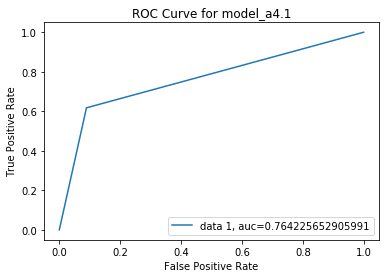

In [332]:
from sklearn import metrics as mt
import matplotlib.pyplot as plt

fpr, tpr, _ = mt.roc_curve(np.array(y_test[:23510]),np.array(pred_out))
auc = mt.roc_auc_score(np.array(y_test[:23510]),np.array(pred_out))
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve for model_a4.1')
plt.legend(loc=4)
plt.show()

In [49]:
ada_pred_ts

array(['attack', 'normal', 'attack', ..., 'attack', 'normal', 'attack'],
      dtype=object)

In [50]:
y_pred = model.predict(np.array(input_vec))

In [51]:
print(rf_pred_ts[0])
print(ada_pred_ts[0])
#print(svc_pred_ts[0])
print(y_pred[0])

attack
attack
[0.54447055 0.92882854 0.6476975 ]


In [52]:
params = list(perf_measure(np.array(y_test),pred_out))
cal_fpr_acc(params[0],params[1],params[2],params[3])

(0.02685546875, 0.7829008932369205)

In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
y_pred = model.predict(np.array(input_vec))

In [55]:
y_pred

array([[0.54447055, 0.92882854, 0.6476975 ],
       [0.53475446, 0.9231151 , 0.51081115],
       [0.55492353, 0.9339014 , 0.63704646],
       ...,
       [0.53481364, 0.9477582 , 0.53170234],
       [0.53544444, 0.9187749 , 0.5128114 ],
       [0.5652825 , 0.9583261 , 0.45384237]], dtype=float32)

In [56]:
perf_measure(np.array(y_test),y_pred)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
model.predict(np.array(state_vec_list[30:50]))